# Assignment 5

**Harsh Agrawal**
 **21BIT0412**

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#Loading Dataset

df = pd.read_csv("D:/Vit/SmartBridge/Assignment 5/Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
#Understanding Dataset Size

df.shape

(200, 5)

In [17]:
#Checking for null values

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* Since count are same hence we observe that dataset does not contain any null values

# Data PreProcessing

* We need to find the Cluster of data between the columns Annual Income and Spending Score.
Hence we will drop other columns

In [18]:
data = df.drop(columns=['CustomerID','Gender','Age'],axis=1)

In [19]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


* Now since we have got two columns to apply our algorithm. We will first Scale the data before using K-Means

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
scaler.fit(data)
scaler.transform(data)

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

**Visulaizing Current Data**

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

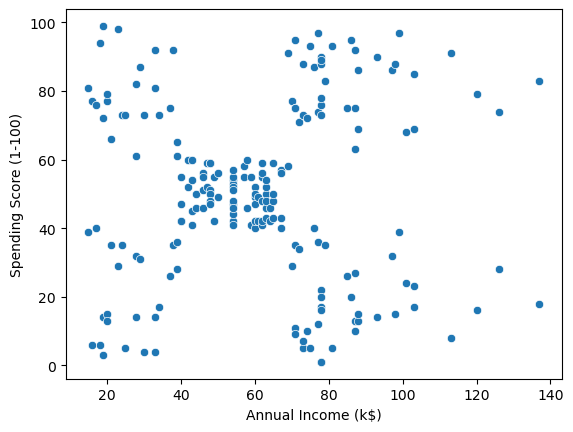

In [23]:
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'])

* we Observe that data is scatterd unevenly and we cannot clearly observe any result.
* Hence we will be using Elbow method to find exact number of clusters

# Elbow Method

In [24]:
from sklearn.cluster import KMeans

In [25]:
wcss = []
for i in range(1,10):
    km= KMeans(n_clusters=i)
    km.fit_predict(data)
    wcss.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
wcss

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37271.886236589504,
 31280.903845940928,
 25011.83934915659,
 21794.885609098197]

Text(0, 0.5, 'WCSS')

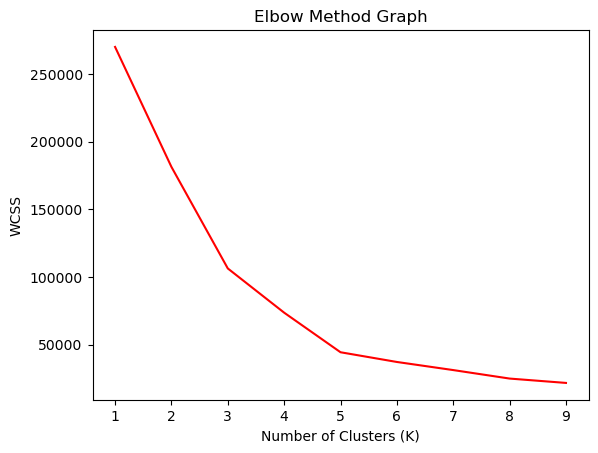

In [29]:
plt.plot(range(1,10),wcss,color='r')
plt.title('Elbow Method Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

* We observe that 5 is our elbow point

# Applying KMeans Algorithm

In [33]:
chosen_k = 5
kmeans = KMeans(n_clusters=chosen_k, init='k-means++', random_state=42,n_init=10)
data['KMeans_Cluster'] = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

In [34]:
data.head()


,Annual Income (k$),Spending Score (1-100),KMeans_Cluster
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


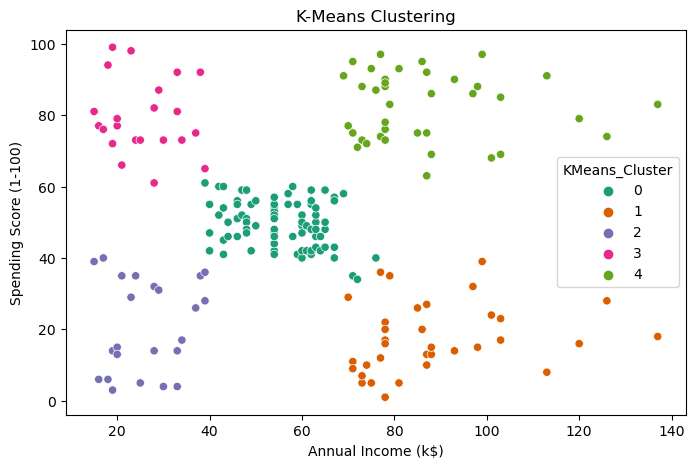

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='Dark2')
plt.title('K-Means Clustering')
plt.show()